In [1794]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

import os
import numpy as np

## NBA MVP Prediction Model
Using a random forest classifier to predict if a player will recieve MVP award. Random Forest is based off an all star players statistics dataset. Additionally, I have added the target feature 'MVP' for the apropriate winners as training data. I have also appended win % and team rank to help determine MVP status

See bottom for prediction of top 10 2022 NBA MVP Candidates

### Team Rank and Win Percentage Data from 2003 - 2022

In [1795]:

D2022 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    "Team": ["Phoenix", "Golden State", "Memphis", "Miami", "Milwaukee", "Boston", "Dallas", "Philadelphia", "Utah", "Toronto", "Denver", "Minnesota", "Chicago", "Cleveland", "Charlotte", "Brooklyn", "Atlanta", "LA Clippers", "New York", "New Orleans", "Washington", "San Antonio", "LA Lakers", "Sacramento", "Portland", "Indiana", "Okla City", "Detroit", "Orlando", "Houston"],
    "Win Percentage": [0.747, 0.664, 0.660, 0.640, 0.617, 0.613, 0.610, 0.606, 0.580, 0.568, 0.563, 0.551, 0.540, 0.524, 0.518, 0.517, 0.517, 0.500, 0.451, 0.444, 0.427, 0.410, 0.402, 0.366, 0.329, 0.305, 0.293, 0.281, 0.268, 0.244, 0.244],
    "Year": [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
}
D2021 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 21, 21, 21, 24, 25, 26, 26, 28, 29, 30],
    "Team": ["Utah", "Phoenix", "Philadelphia", "Brooklyn", "Milwaukee", "LA Clippers", "Denver", "LA Lakers", "Dallas", "Atlanta", "Portland", "New York", "Golden State", "Miami", "Memphis", "Boston", "Indiana", "Washington", "San Antonio", "Charlotte", "New Orleans", "Chicago", "Sacramento", "Toronto", "Minnesota", "Okla City", "Cleveland", "Orlando", "Detroit", "Houston"],
    "Win Percentage": [0.699, 0.692, 0.667, 0.655, 0.653, 0.626, 0.622, 0.570, 0.570, 0.567, 0.564, 0.546, 0.527, 0.526, 0.519, 0.487, 0.473, 0.456, 0.452, 0.452, 0.431, 0.431, 0.431, 0.375, 0.319, 0.306, 0.306, 0.292, 0.278, 0.278, 0.236],
    "Year": [2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
}
D2020 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    "Team": ["LA Lakers", "Milwaukee", "Toronto", "LA Clippers", "Boston", "Miami", "Denver", "Okla City", "Utah", "Indiana", "Houston", "Philadelphia", "Dallas", "Phoenix", "Portland", "Brooklyn", "Memphis", "San Antonio", "Orlando", "Sacramento", "New Orleans", "Charlotte", "Washington", "Chicago", "New York", "Detroit", "Atlanta", "Minnesota", "Cleveland", "Golden State"],
    "Win Percentage": [0.739, 0.735, 0.723, 0.659, 0.652, 0.617, 0.598, 0.595, 0.595, 0.584, 0.583, 0.558, 0.556, 0.466, 0.463, 0.461, 0.460, 0.451, 0.436, 0.431, 0.417, 0.354, 0.347, 0.339, 0.318, 0.303, 0.297, 0.292, 0.231],
    "Year": [2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
}
D2019 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 16, 17, 17, 17, 20, 21, 22, 22, 22, 25, 26, 27, 28, 28, 30],
    "Team": ["Milwaukee", "Toronto", "Golden State", "Denver", "Houston", "Portland", "Philadelphia", "Boston", "Utah", "Okla City", "San Antonio", "LA Clippers", "Indiana", "Orlando", "Brooklyn", "Detroit", "Charlotte", "Sacramento", "Miami", "LA Lakers", "Minnesota", "New Orleans", "Memphis", "Dallas", "Washington", "Atlanta", "Chicago", "Cleveland", "Phoenix", "New York"],
    "Win Percentage": [0.722, 0.698, 0.683, 0.635, 0.634, 0.622, 0.617, 0.593, 0.586, 0.575, 0.573, 0.568, 0.558, 0.494, 0.494, 0.477, 0.476, 0.476, 0.476, 0.451, 0.439, 0.402, 0.402, 0.402, 0.390, 0.354, 0.268, 0.232, 0.232, 0.207],
    "Year": [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
}
D2018 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 26, 27, 27, 29, 30],
    "Team": ["Houston", "Golden State", "Toronto", "Boston", "Philadelphia", "Cleveland", "New Orleans", "Indiana", "Utah", "Portland", "Okla City", "Denver", "Minnesota", "San Antonio", "Milwaukee", "Miami", "LA Clippers", "Washington", "Detroit", "Charlotte", "LA Lakers", "New York", "Brooklyn", "Chicago", "Sacramento", "Orlando", "Atlanta", "Dallas", "Memphis", "Phoenix"],
    "Win Percentage": [0.768, 0.718, 0.685, 0.654, 0.620, 0.596, 0.582, 0.573, 0.570, 0.570, 0.568, 0.561, 0.552, 0.552, 0.528, 0.517, 0.512, 0.511, 0.476, 0.439, 0.427, 0.354, 0.342, 0.329, 0.329, 0.305, 0.293, 0.293, 0.268, 0.256],
    "Year": [2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
}
D2017 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 8, 10, 11, 11, 13, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 26, 27, 28, 29, 30],
    "Team": ["Golden State", "San Antonio", "Houston", "Cleveland", "Boston", "LA Clippers", "Toronto", "Utah", "Washington", "Okla City", "Atlanta", "Memphis", "Miami", "Milwaukee", "Chicago", "Indiana", "Denver", "Portland", "Detroit", "Charlotte", "New Orleans", "Dallas", "Sacramento", "Minnesota", "New York", "Orlando", "Philadelphia", "LA Lakers", "Phoenix", "Brooklyn"],
    "Win Percentage": [0.838, 0.704, 0.656, 0.640, 0.620, 0.607, 0.598, 0.591, 0.590, 0.552, 0.511, 0.511, 0.500, 0.500, 0.489, 0.488, 0.488, 0.477, 0.451, 0.439, 0.415, 0.402, 0.390, 0.378, 0.378, 0.354, 0.342, 0.317, 0.293, 0.244],
    "Year": [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
}
D2016 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 21, 24, 25, 26, 27, 28, 29, 30],
    "Team": ["Golden State", "San Antonio", "Cleveland", "Okla City", "Toronto", "LA Clippers", "Charlotte", "Miami", "Boston", "Atlanta", "Indiana", "Portland", "Chicago", "Detroit", "Washington", "Dallas", "Memphis", "Utah", "Houston", "Orlando", "Sacramento", "Milwaukee", "Denver", "New York", "New Orleans", "Minnesota", "Phoenix", "Brooklyn", "LA Lakers", "Philadelphia"],
    "Win Percentage": [0.830, 0.794, 0.709, 0.660, 0.647, 0.625, 0.573, 0.573, 0.568, 0.565, 0.539, 0.527, 0.512, 0.512, 0.500, 0.494, 0.488, 0.488, 0.483, 0.427, 0.402, 0.402, 0.402, 0.390, 0.366, 0.354, 0.281, 0.256, 0.207, 0.122],
    "Year": [2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
}
D2015 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    "Team": ["Golden State", "Atlanta", "Cleveland", "Houston", "LA Clippers", "Memphis", "San Antonio", "Portland", "Chicago", "Dallas", "Toronto", "Washington", "Okla City", "New Orleans", "Milwaukee", "Phoenix", "Boston", "Indiana", "Utah", "Brooklyn", "Miami", "Charlotte", "Detroit", "Denver", "Sacramento", "Orlando", "LA Lakers", "Philadelphia", "New York", "Minnesota"],
    "Win Percentage": [0.804, 0.694, 0.663, 0.657, 0.656, 0.656, 0.652, 0.598, 0.596, 0.586, 0.570, 0.565, 0.549, 0.523, 0.489, 0.476, 0.465, 0.463, 0.463, 0.455, 0.451, 0.402, 0.390, 0.366, 0.354, 0.305, 0.256, 0.220, 0.207, 0.195],
    "Year": [2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
}
D2014 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 26, 28, 29, 30],
    "Team": ["San Antonio", "Okla City", "Miami", "LA Clippers", "Indiana", "Houston", "Portland", "Golden State", "Memphis", "Phoenix", "Dallas", "Toronto", "Chicago", "Washington", "Brooklyn", "Charlotte", "Minnesota", "Atlanta", "New York", "Denver", "New Orleans", "Cleveland", "Detroit", "Sacramento", "LA Lakers", "Utah", "Boston", "Orlando", "Philadelphia", "Milwaukee"],
    "Win Percentage": [0.740, 0.683, 0.663, 0.663, 0.654, 0.636, 0.634, 0.607, 0.596, 0.585, 0.584, 0.573, 0.563, 0.538, 0.521, 0.500, 0.488, 0.461, 0.451, 0.439, 0.415, 0.402, 0.354, 0.342, 0.329, 0.305, 0.305, 0.281, 0.232, 0.183],
    "Year": [2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
}
D2013 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 21, 22, 23, 23, 25, 26, 27, 28, 29, 30],
    "Team": ["Miami", "San Antonio", "Okla City", "Denver", "Memphis", "LA Clippers", "New York", "Indiana", "Brooklyn", "Golden State", "Houston", "Chicago", "Utah", "LA Lakers", "Atlanta", "Dallas", "Boston", "Milwaukee", "Philadelphia", "Toronto", "Portland", "Minnesota", "Washington", "Detroit", "Sacramento", "New Orleans", "Phoenix", "Cleveland", "Charlotte", "Orlando"],
    "Win Percentage": [0.779, 0.716, 0.699, 0.671, 0.660, 0.659, 0.638, 0.600, 0.584, 0.564, 0.534, 0.532, 0.524, 0.523, 0.523, 0.500, 0.494, 0.442, 0.415, 0.415, 0.402, 0.378, 0.354, 0.354, 0.342, 0.329, 0.305, 0.293, 0.256, 0.244],
    "Year": [2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
}
D2012 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 18, 19, 20, 21, 22, 23, 23, 25, 25, 27, 27, 29, 30],
    "Team": ["San Antonio", "Chicago", "Okla City", "Miami", "Indiana", "Memphis", "LA Lakers", "Atlanta", "Boston", "LA Clippers", "Denver", "Orlando", "Philadelphia", "New York", "Houston", "Utah", "Dallas", "Phoenix", "Milwaukee", "Portland", "Minnesota", "Detroit", "Golden State", "Toronto", "Brooklyn", "Sacramento", "Cleveland", "New Orleans", "Washington", "Charlotte"],
    "Win Percentage": [0.750, 0.722, 0.706, 0.693, 0.623, 0.603, 0.590, 0.583, 0.581, 0.571, 0.562, 0.535, 0.532, 0.521, 0.515, 0.514, 0.514, 0.500, 0.470, 0.424, 0.394, 0.379, 0.349, 0.349, 0.333, 0.333, 0.318, 0.318, 0.303, 0.106],
    "Year": [2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
}
D2011 = {
    "Rank": [1, 2, 3, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 25, 27, 28, 29, 30],
    "Team": ["Chicago", "San Antonio", "Miami", "Dallas", "Boston", "LA Lakers", "Okla City", "Orlando", "Denver", "Portland", "Memphis", "New Orleans", "Atlanta", "Houston", "New York", "Phoenix", "Philadelphia", "Utah", "Golden State", "Indiana", "Milwaukee", "Charlotte", "LA Clippers", "Detroit", "Sacramento", "Brooklyn", "Washington", "Toronto", "Cleveland", "Minnesota"],
    "Win Percentage": [0.725, 0.716, 0.706, 0.706, 0.670, 0.663, 0.647, 0.614, 0.586, 0.568, 0.558, 0.546, 0.532, 0.524, 0.488, 0.488, 0.483, 0.476, 0.439, 0.427, 0.415, 0.390, 0.366, 0.293, 0.293, 0.281, 0.268, 0.232, 0.207],
    "Year": [2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011],
}
D2010 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 12, 13, 14, 15, 16, 17, 17, 19, 20, 21, 22, 22, 24, 24, 26, 26, 28, 29, 30],
    "Team": ["Cleveland", "Orlando", "LA Lakers", "Phoenix", "Dallas", "Denver", "Utah", "Boston", "Atlanta", "Portland", "Okla City", "San Antonio", "Miami", "Milwaukee", "Houston", "Charlotte", "Toronto", "Memphis", "Chicago", "New Orleans", "Indiana", "New York", "LA Clippers", "Philadelphia", "Detroit", "Golden State", "Washington", "Sacramento", "Minnesota", "Brooklyn"],
    "Win Percentage": [0.720, 0.719, 0.695, 0.653, 0.648, 0.625, 0.620, 0.613, 0.613, 0.591, 0.591, 0.587, 0.552, 0.551, 0.512, 0.512, 0.488, 0.488, 0.483, 0.451, 0.390, 0.354, 0.354, 0.329, 0.329, 0.317, 0.317, 0.301, 0.183, 0.146],
    "Year": [2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
}
D2009 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 20, 22, 23, 24, 25, 25, 27, 28, 28, 30],
    "Team": ["Cleveland", "LA Lakers", "Boston", "Orlando", "Denver", "Portland", "San Antonio", "Houston", "Dallas", "New Orleans", "Utah", "Phoenix", "Atlanta", "Miami", "Chicago", "Philadelphia", "Detroit", "Indiana", "Charlotte", "Milwaukee", "Brooklyn", "Toronto", "New York", "Golden State", "Minnesota", "Memphis", "Okla City", "LA Clippers", "Washington", "Sacramento"],
    "Win Percentage": [0.792, 0.771, 0.719, 0.679, 0.653, 0.636, 0.632, 0.632, 0.598, 0.575, 0.563, 0.561, 0.548, 0.517, 0.494, 0.489, 0.454, 0.439, 0.427, 0.415, 0.415, 0.402, 0.390, 0.354, 0.293, 0.293, 0.281, 0.232, 0.232, 0.207],
    "Year": [2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009],
}
D2008 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 25, 27, 27, 29, 30],
    "Team": ["Boston", "Detroit", "LA Lakers", "New Orleans", "San Antonio", "Houston", "Phoenix", "Utah", "Orlando", "Dallas", "Golden State", "Denver", "Cleveland", "Washington", "Portland", "Toronto", "Philadelphia", "Sacramento", "Atlanta", "Indiana", "Brooklyn", "Chicago", "Charlotte", "Milwaukee", "LA Clippers", "New York", "Minnesota", "Memphis", "Okla City", "Miami"],
    "Win Percentage": [0.759, 0.697, 0.689, 0.670, 0.657, 0.648, 0.644, 0.638, 0.620, 0.598, 0.585, 0.581, 0.547, 0.511, 0.500, 0.483, 0.477, 0.463, 0.449, 0.439, 0.415, 0.402, 0.390, 0.317, 0.281, 0.281, 0.268, 0.268, 0.244, 0.183],
    "Year": [2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008],
}
D2007 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 21, 21, 21, 24, 24, 26, 27, 28, 29, 30],
    "Team": ["Dallas", "San Antonio", "Phoenix", "Detroit", "Houston", "Cleveland", "Utah", "Chicago", "Toronto", "Denver", "Miami", "Golden State", "Brooklyn", "LA Lakers", "LA Clippers", "Washington", "New Orleans", "Orlando", "Philadelphia", "Indiana", "Sacramento", "New York", "Charlotte", "Portland", "Minnesota", "Okla City", "Atlanta", "Milwaukee", "Boston", "Memphis"],
    "Win Percentage": [0.784, 0.726, 0.720, 0.643, 0.618, 0.608, 0.606, 0.598, 0.557, 0.529, 0.512, 0.505, 0.500, 0.494, 0.488, 0.477, 0.476, 0.465, 0.427, 0.427, 0.402, 0.402, 0.402, 0.390, 0.390, 0.378, 0.366, 0.342, 0.293, 0.268],
    "Year": [2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007],
}
D2006 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 13, 15, 15, 17, 18, 18, 20, 21, 22, 22, 24, 24, 26, 27, 27, 29, 30],
    "Team": ["Detroit", "San Antonio", "Dallas", "Miami", "Phoenix", "Cleveland", "Brooklyn", "LA Clippers", "Memphis", "LA Lakers", "Sacramento", "Denver", "Washington", "Utah", "Indiana", "Chicago", "Milwaukee", "New Orleans", "Philadelphia", "Orlando", "Okla City", "Golden State", "Houston", "Boston", "Minnesota", "Toronto", "Charlotte", "Atlanta", "New York", "Portland"],
    "Win Percentage": [0.740, 0.737, 0.705, 0.648, 0.628, 0.600, 0.581, 0.575, 0.570, 0.539, 0.523, 0.517, 0.500, 0.500, 0.489, 0.489, 0.471, 0.463, 0.463, 0.439, 0.427, 0.415, 0.415, 0.402, 0.402, 0.329, 0.317, 0.317, 0.281, 0.256],
    "Year": [2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006],
}
D2005 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 21, 23, 23, 25, 26, 27, 28, 28, 30],
    "Team": ["Phoenix", "Miami", "San Antonio", "Dallas", "Detroit", "Okla City", "Houston", "Sacramento", "Denver", "Chicago", "Boston", "Minnesota", "Washington", "Indiana", "Memphis", "Cleveland", "Philadelphia", "Brooklyn", "LA Clippers", "Orlando", "Golden State", "LA Lakers", "New York", "Toronto", "Milwaukee", "Portland", "Utah", "New Orleans", "Charlotte", "Atlanta"],
    "Win Percentage": [0.732, 0.722, 0.714, 0.674, 0.645, 0.624, 0.607, 0.586, 0.575, 0.557, 0.539, 0.537, 0.533, 0.526, 0.523, 0.512, 0.506, 0.488, 0.451, 0.439, 0.415, 0.415, 0.402, 0.402, 0.366, 0.329, 0.317, 0.220, 0.220, 0.159],
    "Year": [2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005],
}
D2004 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 18, 20, 21, 22, 22, 24, 25, 25, 27, 28, 29],
    "Team": ["Indiana", "San Antonio", "Minnesota", "Detroit", "LA Lakers", "Sacramento", "Dallas", "Memphis", "Brooklyn", "Houston", "Utah", "Denver", "Miami", "Portland", "New Orleans", "Milwaukee", "New York", "Okla City", "Golden State", "Cleveland", "Boston", "Toronto", "Philadelphia", "Phoenix", "LA Clippers", "Atlanta", "Washington", "Chicago", "Orlando"],
    "Win Percentage": [0.725, 0.685, 0.680, 0.667, 0.664, 0.660, 0.609, 0.581, 0.581, 0.529, 0.512, 0.506, 0.505, 0.500, 0.494, 0.483, 0.454, 0.451, 0.451, 0.427, 0.419, 0.402, 0.402, 0.354, 0.342, 0.342, 0.305, 0.281, 0.256],
    "Year": [2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004],
}

D2003 = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    "Team": ['Dallas', 'Sacramento', 'San Antonio', 'Brooklyn', 'Detroit', 'Utah', 'Portland', 'Indiana', 'LA Lakers', 'Minnesota', 'Houston', 'Philadelphia', 'Phoenix', 'New Orleans', 'Okla City', 'Milwaukee', 'Orlando', 'Golden State', 'Boston', 'Washington', 'New York', 'Memphis', 'LA Clippers', 'Atlanta', 'Chicago', 'Miami', 'Toronto', 'Denver', 'Cleveland'],
    "Win Percentage%": [.732, .720, .732, .598, .610, .573, .610, .585, .610, .622, .524, .585, .537, .573, .488, .512, .537, .463, .512, .451, .451, .341, .329, .427, .366, .305, .293, .207, .207],
    "Year": [2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003],
}

In [1796]:
all_dicts = [D2022, D2021, D2020, D2019, D2018, D2017, D2016, D2015, D2014, D2013, D2012, D2011, D2010, D2009, D2008]

# Iterate through each dictionary and print the length of the "Win Percentage" list
for year_data in all_dicts:
    win_percentage_list = year_data["Win Percentage"]
    year = year_data["Year"][0]
    print(f"Year {year}: Length of Win Percentage list = {len(win_percentage_list)}")

Year 2022: Length of Win Percentage list = 31
Year 2021: Length of Win Percentage list = 31
Year 2020: Length of Win Percentage list = 29
Year 2019: Length of Win Percentage list = 30
Year 2018: Length of Win Percentage list = 30
Year 2017: Length of Win Percentage list = 30
Year 2016: Length of Win Percentage list = 30
Year 2015: Length of Win Percentage list = 30
Year 2014: Length of Win Percentage list = 30
Year 2013: Length of Win Percentage list = 30
Year 2012: Length of Win Percentage list = 30
Year 2011: Length of Win Percentage list = 29
Year 2010: Length of Win Percentage list = 30
Year 2009: Length of Win Percentage list = 30
Year 2008: Length of Win Percentage list = 30


### Reading in each ALL STAR player stats dataframes, and combining into 1

In [1797]:
data_folder = "data" 

dataframes_list = []  # Initialize an empty list to store DataFrames

# Get a list of all the files in the data folder (excluding directories)
file_list = [file for file in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, file))]

for file in file_list:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    
    # Extract the first 7 characters from the file name (excluding the extension)
    year = file[:7]
    
    # Add a new column named "Year" with the value of the extracted year to the DataFrame
    df['Year'] = year
    
    dataframes_list.append(df)

# Combine all DataFrames in dataframes_list into a single DataFrame
df = pd.concat(dataframes_list, ignore_index=True)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP,Year
0,Ray Allen,SG,35,BOS,80,80,36.1,6.0,12.2,0.491,...,2.8,3.4,2.7,1.0,0.2,1.5,1.8,16.5,0,2010-11
1,Carmelo Anthony,SF,26,TOT,77,77,35.7,8.9,19.5,0.455,...,5.8,7.3,2.9,0.9,0.6,2.7,2.9,25.6,0,2010-11
2,Chris Bosh,PF,26,MIA,77,77,36.3,6.8,13.7,0.496,...,6.5,8.3,1.9,0.8,0.6,1.8,2.2,18.7,0,2010-11
3,Kobe Bryant,SG,32,LAL,82,82,33.9,9.0,20.0,0.451,...,4.1,5.1,4.7,1.2,0.1,3.0,2.1,25.3,0,2010-11
4,Tim Duncan,C,34,SAS,76,76,28.4,5.5,11.0,0.500,...,6.7,8.9,2.7,0.7,1.9,1.6,1.6,13.4,0,2010-11


### ADDING YEAR COLUMN

Feature Engineering: Adding mvp status to each df before I add them all together

In [1798]:
def extract_second_year(year_range):
    y = year_range.split('-')[1]
    r = '20'+y
    return r

# Apply the function to the 'Year' column and update it with the second year
df['Year'] = df['Year'].apply(extract_second_year)
df['Year'] = df['Year'].astype(int)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP,Year
0,Ray Allen,SG,35,BOS,80,80,36.1,6.0,12.2,0.491,...,2.8,3.4,2.7,1.0,0.2,1.5,1.8,16.5,0,2011
1,Carmelo Anthony,SF,26,TOT,77,77,35.7,8.9,19.5,0.455,...,5.8,7.3,2.9,0.9,0.6,2.7,2.9,25.6,0,2011
2,Chris Bosh,PF,26,MIA,77,77,36.3,6.8,13.7,0.496,...,6.5,8.3,1.9,0.8,0.6,1.8,2.2,18.7,0,2011
3,Kobe Bryant,SG,32,LAL,82,82,33.9,9.0,20.0,0.451,...,4.1,5.1,4.7,1.2,0.1,3.0,2.1,25.3,0,2011
4,Tim Duncan,C,34,SAS,76,76,28.4,5.5,11.0,0.500,...,6.7,8.9,2.7,0.7,1.9,1.6,1.6,13.4,0,2011


### Adding team rank and win percentage columns

In [1799]:
df['Win %'] = 0
df['Team Rank'] = 0

df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,MVP,Year,Win %,Team Rank
0,Ray Allen,SG,35,BOS,80,80,36.1,6.0,12.2,0.491,...,2.7,1.0,0.2,1.5,1.8,16.5,0,2011,0,0
1,Carmelo Anthony,SF,26,TOT,77,77,35.7,8.9,19.5,0.455,...,2.9,0.9,0.6,2.7,2.9,25.6,0,2011,0,0
2,Chris Bosh,PF,26,MIA,77,77,36.3,6.8,13.7,0.496,...,1.9,0.8,0.6,1.8,2.2,18.7,0,2011,0,0
3,Kobe Bryant,SG,32,LAL,82,82,33.9,9.0,20.0,0.451,...,4.7,1.2,0.1,3.0,2.1,25.3,0,2011,0,0
4,Tim Duncan,C,34,SAS,76,76,28.4,5.5,11.0,0.500,...,2.7,0.7,1.9,1.6,1.6,13.4,0,2011,0,0


### Creating map, so that each player can be fitted with corresponding team rank and win %

In [1800]:
abbr_to_team_name = {
    "IND": "Indiana",
    'BRK': 'Brooklyn',
    'NJN': 'Brooklyn',
    "SAS": "San Antonio",
    "MIN": "Minnesota",
    "DET": "Detroit",
    "LAL": "LA Lakers",
    "SAC": "Sacramento",
    "DAL": "Dallas",
    "MEM": "Memphis",
    "BKN": "Brooklyn",
    "HOU": "Houston",
    "UTA": "Utah",
    "DEN": "Denver",
    "MIA": "Miami",
    "POR": "Portland",
    "NOP": "New Orleans",
    'NOH': "New Orleans",
    "MIL": "Milwaukee",
    "NYK": "New York",
    "OKC": "Okla City",
    'SEA': "Okla City",
    "GSW": "Golden State",
    "CLE": "Cleveland",
    "BOS": "Boston",
    "TOR": "Toronto",
    "PHI": "Philadelphia",
    "PHX": "Phoenix",
    'PHO': "Phoenix",
    "LAC": "LA Clippers",
    "ATL": "Atlanta",
    "WAS": "Washington",
    "CHI": "Chicago",
    "ORL": "Orlando",
    'CHO': "Charlotte",
    'CHA': "Charlotte"
}

### Assigning team rank and win % to each player, based on the team datasets above

In [1801]:
count = 0
for index in range(520):
    player_year = df.at[index, 'Year']
    year_str = "D" + str(player_year)
    abbreviation = df.at[index, 'Tm']
    # Look up the longer team name from the abbreviation map
    team_name = abbr_to_team_name.get(abbreviation, '')
    if year_str in globals():
        dict_var = globals()[year_str]
        # Check if the team_name from the DataFrame row matches the 'Team' key in dict_var
        if 'Team' in dict_var and team_name in dict_var['Team']:
            update_index = dict_var['Team'].index(team_name)
            try:
                # Update 'Win %' and 'Team Rank' in the DataFrame row based on dict_var values
                df.at[index, 'Team Rank'] = dict_var['Rank'][update_index]
                df.at[index, 'Win %'] = dict_var['Win Percentage'][update_index]
                count += 1
            except Exception as e:
                print(e)
    else:
        # Handle the case when the dictionary for that year doesn't exist
        print(f"Dictionary for year {player_year} not found.")
print("Players updated:", count)

list index out of range
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
'Win Percentage'
Players updated: 482


### Changing MVP feature to 1 if they one an MVP

In [1802]:

#List of Players and corresponding years that they won NBA ALL STAR MVP
data = {
    'Year': [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004],
    'Player': [
        'Nikola Jokic', 'Nikola Jokic', 'Giannis Antetokounmpo', 'Giannis Antetokounmpo',
        'James Harden', 'Russell Westbrook', 'Stephen Curry', 'Stephen Curry',
        'Kevin Durant', 'LeBron James', 'LeBron James', 'Derrick Rose', 'LeBron James',
        'LeBron James', 'Kobe Bryant', 'Dirk Nowitzki', 'Steve Nash', 'Steve Nash',
        'Kevin Garnett', 'Tim Duncan'
    ]
}
players_to_change = [
    {"Player": player, "Year": year}
    for player, year in zip(data["Player"], data["Year"])
]

players_to_change

[{'Player': 'Nikola Jokic', 'Year': 2022},
 {'Player': 'Nikola Jokic', 'Year': 2021},
 {'Player': 'Giannis Antetokounmpo', 'Year': 2020},
 {'Player': 'Giannis Antetokounmpo', 'Year': 2019},
 {'Player': 'James Harden', 'Year': 2018},
 {'Player': 'Russell Westbrook', 'Year': 2017},
 {'Player': 'Stephen Curry', 'Year': 2016},
 {'Player': 'Stephen Curry', 'Year': 2015},
 {'Player': 'Kevin Durant', 'Year': 2014},
 {'Player': 'LeBron James', 'Year': 2013},
 {'Player': 'LeBron James', 'Year': 2012},
 {'Player': 'Derrick Rose', 'Year': 2011},
 {'Player': 'LeBron James', 'Year': 2010},
 {'Player': 'LeBron James', 'Year': 2009},
 {'Player': 'Kobe Bryant', 'Year': 2008},
 {'Player': 'Dirk Nowitzki', 'Year': 2007},
 {'Player': 'Steve Nash', 'Year': 2006},
 {'Player': 'Steve Nash', 'Year': 2005},
 {'Player': 'Kevin Garnett', 'Year': 2004}]

In [1803]:
for player_info in players_to_change:
    player_name = player_info["Player"]
    player_year = player_info["Year"]
    mask = (df["Player"] == player_name) & (df["Year"] == player_year)
    df.loc[mask, "MVP"] = 1
    

### MVP Winners

In [1804]:
selected_rows = df[df["MVP"] == 1]

# Display the selected rows
print(selected_rows)

                    Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  \
20            Derrick Rose  PG   22  CHI  81  81  37.4   8.8  19.7  0.445   
32           Kevin Garnett  PF   27  MIN  82  82  39.4   9.8  19.6  0.499   
65              Steve Nash  PG   30  PHO  75  75  34.3   5.7  11.4  0.502   
84            LeBron James  SF   25  CLE  76  76  39.0  10.1  20.1  0.503   
129  Giannis Antetokounmpo  PF   24  MIL  72  72  32.8  10.0  17.3  0.578   
162           Kevin Durant  SF   25  OKC  81  81  38.5  10.5  20.8  0.503   
181  Giannis Antetokounmpo  PF   25  MIL  63  63  30.4  10.9  19.7  0.553   
220           LeBron James  PF   28  MIA  76  76  37.9  10.1  17.8  0.565   
281      Russell Westbrook  PG   28  OKC  81  81  34.6  10.2  24.0  0.425   
296           James Harden  SG   28  HOU  72  72  35.4   9.0  20.1  0.449   
326             Steve Nash  PG   31  PHO  79  79  35.4   6.8  13.4  0.512   
340            Kobe Bryant  SG   29  LAL  82  82  38.9   9.5  20.6  0.459   

### Dropping and Sorting

In [1805]:
#sort by year
df = df.sort_values(by='Year')
# copy names for future testing
year_player_df = df[['Year', 'Player']].copy()
df = df.dropna()
df = df.drop(columns = ['Tm','Player', 'Age', 'Year', 'Pos'] , axis = 1)
#df = pd.get_dummies(df)
#decided that factoring in position was not relevant to mvp prediction


In [1806]:
df.MVP.value_counts()

0    493
1     17
Name: MVP, dtype: int64

### Grab Some Extra test Data for Later

In [1807]:

total_rows = len(df)
cut_off_percentage = 0.15

# Calculate the number of rows to cut off
num_rows_to_cut = int(total_rows * cut_off_percentage)

# Create a new DataFrame containing the last 15% of the original DataFrame
cut_off_df = df.iloc[-num_rows_to_cut:]
#also do the same with the names
cut_off_year_player_df = year_player_df.iloc[-num_rows_to_cut:]


# Cutting 15% off original df
year_player_df.iloc[:-num_rows_to_cut]
df = df.iloc[:-num_rows_to_cut]

### Imbalanced Dataset, so we oversample

In [1808]:
from imblearn.over_sampling import SMOTE
y = df["MVP"]
X = df.drop("MVP", axis=1)  # Replace "Target_Column_Name" with the name of your target column.


# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the oversampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name="MVP")], axis=1)
y_resampled.value_counts()

0    417
1    417
Name: MVP, dtype: int64

### Splitting Train and Test Data

In [1809]:
train_features, test_features, train_labels, test_labels = train_test_split(X_resampled, y_resampled, test_size = 0.50,
                                                                           random_state = 42)

## Using Random Grid and 5 fold validation to determin the most Accurate Hyperparameters

In [1810]:
'''
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', None]  # Replace 'auto' with 'sqrt', 'log2', or None
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Create a base Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Create the RandomizedSearchCV model using the random grid and base model
rf_random = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV model to find the best hyperparameters
rf_random.fit(train_features, train_labels)

# Print the best hyperparameters found
print("Best hyperparameters:")
print(rf_random.best_params_)
'''

'\nimport numpy as np\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]\n# Number of features to consider at every split\nmax_features = [\'sqrt\', \'log2\', None]  # Replace \'auto\' with \'sqrt\', \'log2\', or None\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 100, num=10)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n\n# Create the random grid\nrandom_grid = {\n    \'n_estimators\': n_estimators,\n    \'max_features\': max_features,\n    \'max_depth\': max_depth,\n    \'min_samples_split\': min_samples_split,\n    \'min_samples_leaf\': min_samples_l

### Creating best random forest regressor

In [1811]:
class_weights = {0: 1, 1: 30}
rf = RandomForestClassifier(n_estimators=1200,
                                     class_weight=class_weights,
                                     min_samples_split=2,
                                     min_samples_leaf=2,
                                     max_features='log2',
                                     max_depth=None,
                                     bootstrap=False)

# Fit the model on your training data
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 30},
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=1200)

### Evaluation of Model

In [1812]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = 100 * (1 - np.mean(predictions != test_labels))
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [1813]:
best_random = rf_random.best_estimator_
evaluate(best_random, test_features, test_labels)

Model Performance
Accuracy = 98.08%.


### Graphing Predictions

In [1814]:
y_pred = rf.predict(test_features)

In [1815]:
y_pred = np.array(y_pred)  
y_actual = np.array(test_labels)  
y_pred.shape

(417,)

In [1816]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

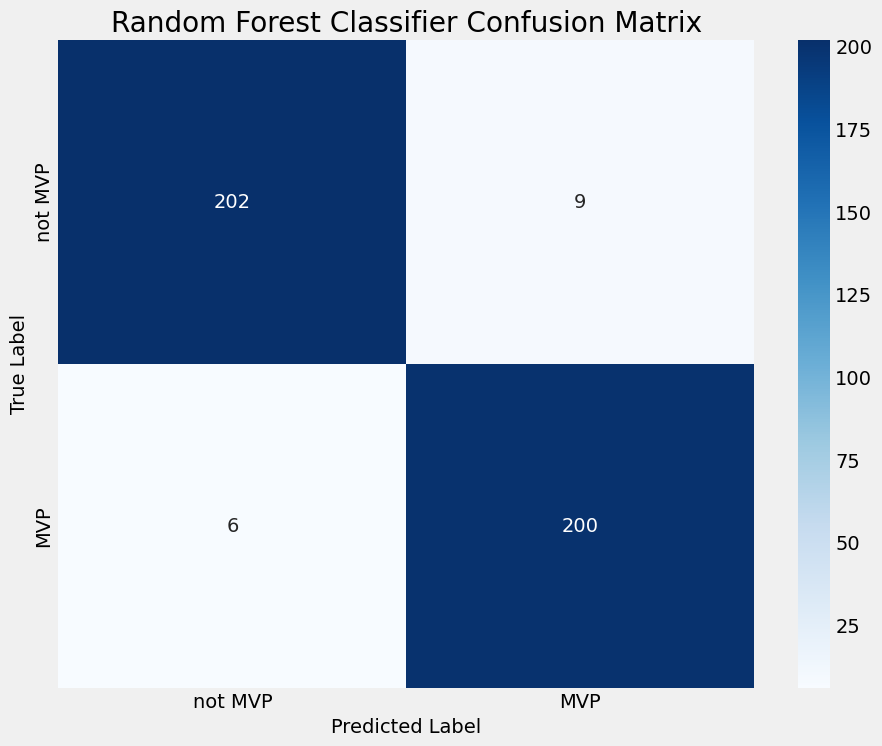

In [1817]:
cm = confusion_matrix(y_actual, y_pred)

# Define the class names
class_names = ['not MVP','MVP']

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1818]:
# Get numerical feature importances
feature_list = list(train_features.columns)
importances = list(rf.feature_importances_)


# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AST                  Importance: 0.14
Variable: Win %                Importance: 0.14
Variable: Team Rank            Importance: 0.13
Variable: TOV                  Importance: 0.08
Variable: 3P                   Importance: 0.07
Variable: ORB                  Importance: 0.07
Variable: 3PA                  Importance: 0.05
Variable: 2P                   Importance: 0.05
Variable: eFG%                 Importance: 0.04
Variable: 3P%                  Importance: 0.03
Variable: 2PA                  Importance: 0.03
Variable: G                    Importance: 0.02
Variable: GS                   Importance: 0.02
Variable: 2P%                  Importance: 0.02
Variable: STL                  Importance: 0.02
Variable: BLK                  Importance: 0.02
Variable: MP                   Importance: 0.01
Variable: FG                   Importance: 0.01
Variable: FGA                  Importance: 0.01
Variable: FG%                  Importance: 0.01
Variable: FT                   Importanc

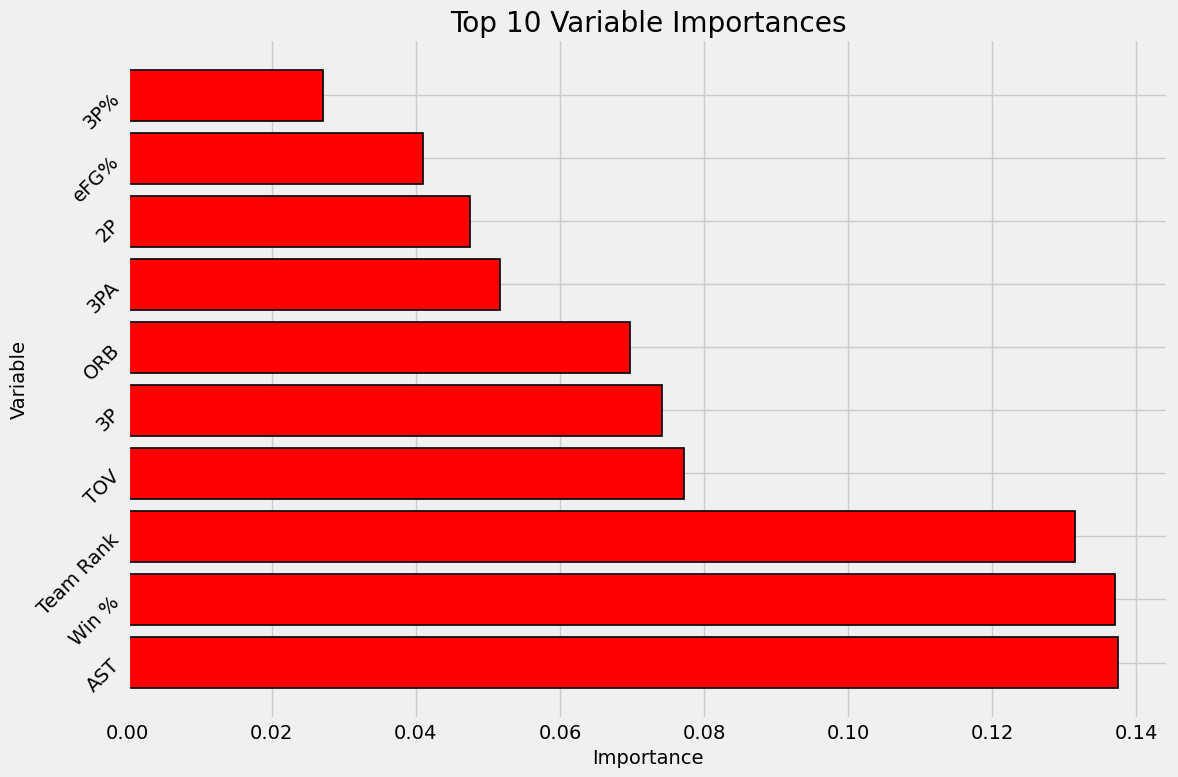

In [1819]:
plt.figure(figsize=(12, 8))
top_n = 10
sorted_importances, sorted_features = zip(*sorted(zip(importances, feature_list), reverse=True))
plt.barh(range(top_n), sorted_importances[:top_n], color='r', edgecolor='k', linewidth=1.2)
plt.yticks(range(top_n), sorted_features[:top_n], rotation=45)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Top 10 Variable Importances')
plt.tight_layout()
plt.show()

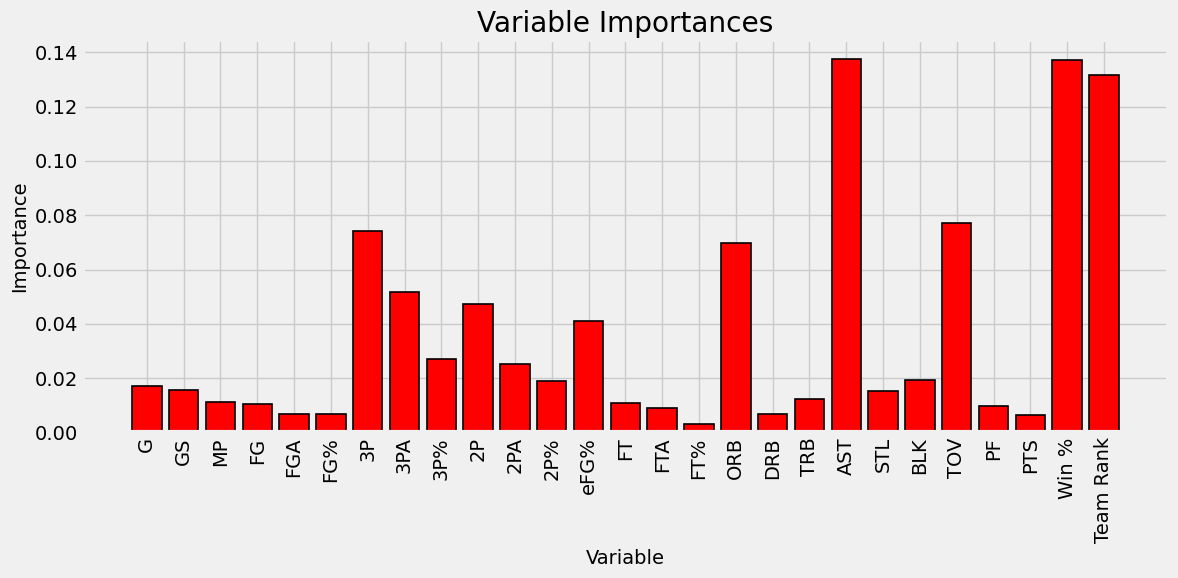

In [1820]:
plt.figure(figsize=(12, 6))

# Rest of the code remains the same
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical', color='r', edgecolor='k', linewidth=1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

# Show the plot
plt.tight_layout()
plt.show()

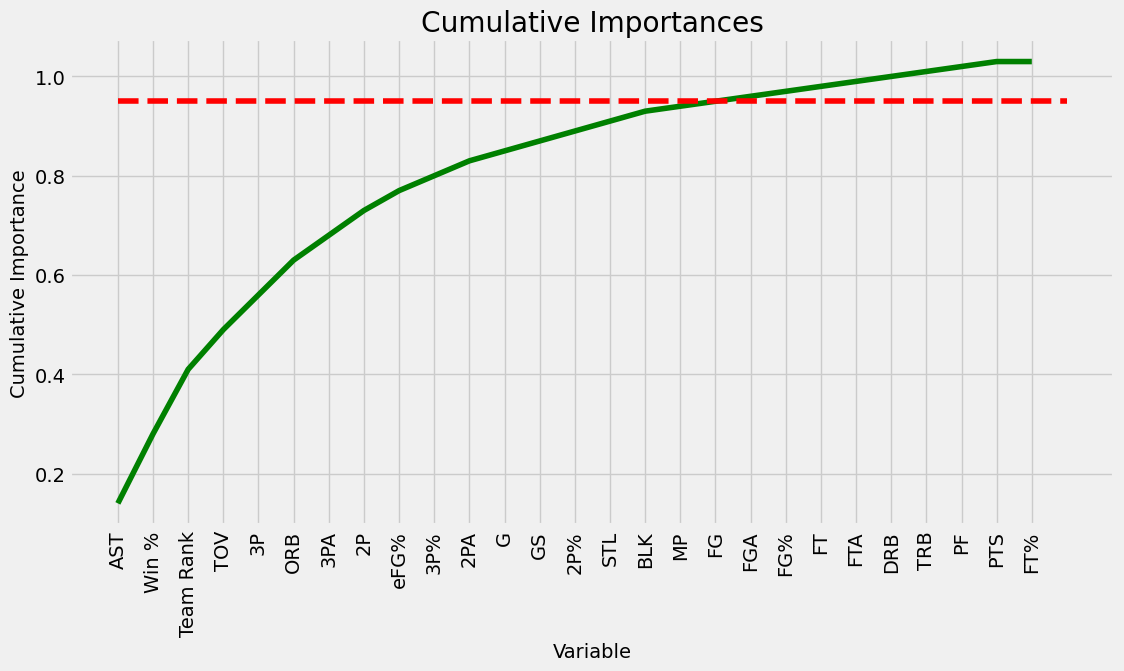

In [1821]:
# Set the figure size to make the plot wider
plt.figure(figsize=(12, 6))

# Rest of the code remains the same
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y=0.95, xmin=0, xmax=len(sorted_importances), color='r', linestyles='dashed')
plt.xticks(x_values, sorted_features, rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

# Show the plot
plt.show()

### More Curves

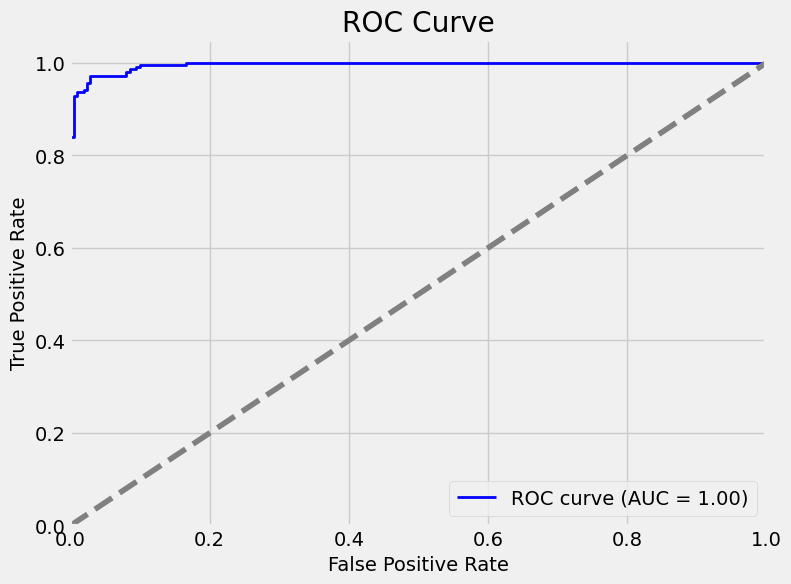

In [1822]:
# 2. ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
probs = rf.predict_proba(test_features)[:, 1]  # Probability of class 1
fpr, tpr, thresholds = roc_curve(test_labels, probs)
roc_auc = roc_auc_score(test_labels, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Example Decision Tree

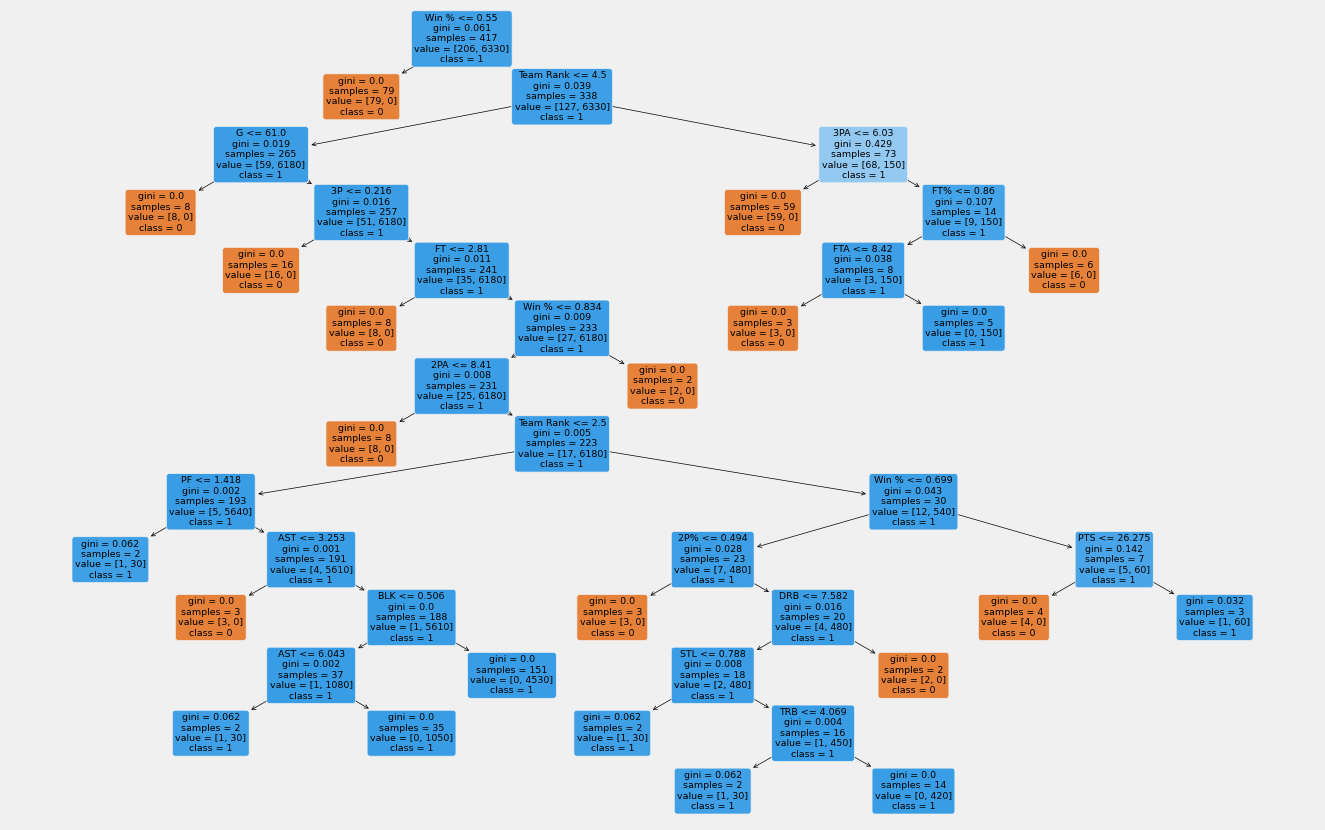

In [1846]:
from sklearn.tree import plot_tree
class_names = [str(label) for label in np.unique(y)]
one_tree = rf.estimators_[1]
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(one_tree, feature_names=feature_list, class_names=class_names, filled=True, rounded=True)
plt.show()

### Testing on extra test data

In [1824]:
target = cut_off_df['MVP']
cut_off_df = cut_off_df.drop('MVP', axis = 1)
pred = rf.predict(cut_off_df)
probs = rf.predict_proba(cut_off_df)

In [1825]:
cut_off_year_player_df

,Year,Player
184,2020,Anthony Davis
185,2020,Luka Dončić
186,2020,Joel Embiid
187,2020,Rudy Gobert
188,2020,James Harden
...,...,...
105,2022,Jimmy Butler
101,2022,Jarrett Allen
102,2022,Giannis Antetokounmpo
116,2022,Nikola Jokić


### Testing on 2022 all stars

In [1845]:
i = 0
top_cands = {}
for row in cut_off_year_player_df.itertuples(index=False):
    player_name = row.Player
    player_year = row.Year
    pred_value = pred[i]  # Adjust the index
    
    if player_year == 2022:
        if (probs[i][1] > 0.045):
            top_cands[player_name] = probs[i][1]
    i += 1
    
sorted_cands = sorted(top_cands.items(), key=lambda x: x[1], reverse=True)

for rank, (player, value) in enumerate(sorted_cands, start=1):
    print(f"{rank}: {player}")

1: Devin Booker
2: Giannis Antetokounmpo
3: Luka Dončić
4: Joel Embiid
5: Ja Morant
6: Jayson Tatum
7: Donovan Mitchell
8: Nikola Jokić
9: Karl-Anthony Towns
10: Chris Paul
